In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/csv/s2-corpus-00_lang.csv')

# A bit of EDA on the data

This has been done on only one file out of 40, this one file contains million records.
As a pre-processing the following steps were preformed:

* Entries with empty abstract were removed. (see `/src/trainTex/trainingFunction.py`)
* Abstracts with less then five sentances (done by splitting at '.' and checking the length) were removed . (see `/utilityScripts/create_reduced_dataset_one_file.py`)
* Abstracts were passed through `polyglot` language detector and a *Language* column was added (see `/utilityScripts/add_language.py`)

Lets check how many record we are left with:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592310 entries, 0 to 592309
Data columns (total 8 columns):
Unnamed: 0       592310 non-null int64
Unnamed: 0.1     592310 non-null int64
id               592310 non-null object
paperAbstract    592273 non-null object
title            592270 non-null object
year             587006 non-null float64
journalName      459691 non-null object
lang             592310 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 36.2+ MB


Almost 600K records. There are two wiredly named columns there that were added in my **heroic** battle with several bugs in pandas/python/internal csv library and the fact that some of the abstracts have non standard characters. They cannot be removed and for the purpose of EDA they can stay there. <br>
Lets check out the language of the abstracts:

In [4]:
lang_count = df.groupby('lang').lang.count()
print(lang_count)

lang
Afar                      1
Afrikaans                 5
Arabic                    3
Azerbaijani               1
Bosnian                   1
Catalan                   4
Chinese                   7
Corsican                  1
Croatian                 29
Czech                     8
Danish                   26
Dutch                    58
English              584880
Estonian                  2
Faroese                   1
Finnish                   2
French                  827
Galician                  4
German                 4902
Hawaiian                  1
Hungarian                10
Indonesian                2
Irish                     7
Italian                  52
Japanese                 25
Khasi                     1
Kinyarwanda               2
Korean                    1
Latin                     8
Luxembourgish             1
Malagasy                  1
Malay                     3
Maltese                   4
Norwegian                 1
Norwegian Nynorsk         4
Polish         

Quite the list..... <br>
As expected the vast majority of abstracts are in English. 
German have more then 1000 abstracts, which I think makes sense as it used to be one of the main acdemic languages.
Lets check some German abstracts to see if they are indeed German:

In [5]:
df[df.lang == 'German']

,Unnamed: 0,Unnamed: 0.1,id,paperAbstract,title,year,journalName,lang
277,277,277,19c1c57384fa64f61d562aed3809906bdbd815ec,"On 1 January 1996, the implementation of the n...",Kostenanalyse der Schilddrüsenchirurgie in ein...,1997.0,Der Chirurg,German
295,295,295,555bd421548073e91f35042133fc22e6ee97175f,Das „Multiple evanescent white dot“-Syndrom (M...,„Multiple evanescent white dot“-Syndrom,2009.0,Spektrum der Augenheilkunde,German
346,346,346,ea4d7b1168128acbd3c4f2a990fae09a7526a6d2,The instantaneous force-velocity curve of mamm...,The instantaneous force-velocity relationship ...,1977.0,Basic Research in Cardiology,German
439,439,439,6af9af75f09d58afe82e95c7240820e2da739810,Epidurale spinale Infektionen sind eine wichti...,Spinale epidurale Infektionen: Initiale MRT-Ze...,2009.0,Klinische Neuroradiologie,German
505,505,505,095b322e29548c6030bcf00bb0b3ca260c85c4ef,Trotz des enormen Fortschritts in der Behandlu...,Update zu Kinasehemmern 2016,2016.0,Zeitschrift für Rheumatologie,German
664,664,664,0b1b1d4af1cf81f4f9a1ad2c4f354ee714967b65,QM-P icht für Vertragsärzte erweitert — Am 17....,Handy raus aus der Hosentasche!,2014.0,Uro-News,German
674,674,674,cbb9b9ca7992d6a15f6be0cca6065ee790208699,I n h a l t : Seite I. Nachtr~ige za den Ersch...,Die Actionsströme und die Theorie der Nervenle...,2005.0,Archiv für die gesamte Physiologie des Mensche...,German
678,678,678,f82245d273da650b83fe6b6e516ec394ac8d1706,Three cases of post-traumatic thrombosis of th...,Die Bedeutung der Kontroll-Angiographie bei Hi...,2004.0,Archiv für Psychiatrie und Nervenkrankheiten,German
871,871,871,94ea717278e7507a23c552a1c3af21030f974753,Seit es Langzeitüberlebende nach der multimoda...,Tumororthopädie,2011.0,Der Orthopäde,German
897,897,897,a4c9b98ad7f17956b6cd758e0c09f99297c278c3,"The activity of Mg++-and Mg++-, Na+-, K+-ATPas...",Adenosintriphosphatase activity in hereditary ...,1967.0,Blut,German


All the journal names seems to be German (except from the 'European Journal of Wood and Wood products', it is now became my life goal to publish something there...) There are actually a few misses, but they are a few from a small fraction anyway so we can safely ignore them. 

While I don't see any reason why there will not be publications in Luxembourgish (which I totaly knew is the official language of Luxembourg https://en.wikipedia.org/wiki/Luxembourgish)  the fact that there is just one abstract in this language makes it obvious that this is a misclassification. <br>
Lets check this out:

In [13]:
df[df.lang == 'Luxembourgish'].paperAbstract

208077    1. Rupert, P.B. & Ferré-D’Amaré, A.R. Nature, ...
Name: paperAbstract, dtype: object

While I only understand Nature but I'm pretty sure this is not Luxembourgish. It looks like nonsense that passed the length check as it contains more then five `.` which translates to more then five sentences. <br>
I'll have to decide weather to take care of this stuff here or at the conversion time (probably not count sentences shorter then a threshold, this will also take care of stuff like : 'Rupert P.B'). It may be too time consuming to pass all strings through this check and the language classification seems to filter them quite good. <br>
from now I'll assume that every language with less then 4 publications is just misclassification or nonsense <br>

Some abstracts have both English and some native language, for example:

In [7]:
df[df.lang == 'Romanian'].paperAbstract.iloc[2]

'The symptoms of depression and those of cardiovascular disease (CVD) overlap substantially. Differentiating between dimensions of depressive symptoms may improve our understanding of the relationship between depression and physical health, in order to find a more adequate antidepressant treatment for patients having both depression and cardiovascular disease. Our aim was to assess the efficacy, tolerability and safety of tianeptine in depressed patients with moderate and severe cardio-vascular disorders. The present survey is an observational naturalistic study conducted in patients with important cardio-vascular disorders who underwent evaluation for depressive symptoms, using the Montgomery Asberg Depression Rating Scale (MADRS) and the selfevaluation Hospital Anxiety and Depression Scale (HADS). The MADRS and HADS were used to examine the efficacy of tianeptine after 28 days of antidepressant therapy. Tolerability of tianeptine and its effects on cardiovascular system was assesed. 

In the final analisys only the abstracts that were identified as English will be taken into account. Mixed abstracts will be removed as the foreign words will just inflate the classifier corpus. Few as they are it does not worth the time nvestment trying to seperate them.

In [8]:
df_filt = df[df.lang.map(lambda x: lang_count[x] > 4)]
df_filt = df_filt[~(df_filt.lang.str.contains('un'))]
df_filt = df_filt[~(df_filt.lang.str.contains('unKnown'))]

## And some graphical EDA

Abstract count by language (on a log scale otherwise English just dwarfs everything)

In [9]:
lang_count = df_filt.groupby('lang').lang.count()

Text(0.5,0,'Number of Abstracts')

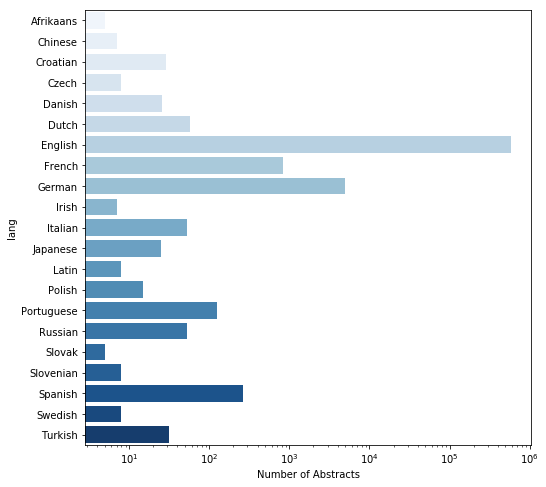

In [15]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(y=lang_count.index, x=lang_count, palette='Blues')
ax.set_xscale('log')
plt.xlabel('Number of Abstracts')

This is a logaritmic scale, so English have not real compatitors, why are there so many Turkish publications??? <br>
Next we will check publication counts per year:

### And a scatter plot of papers count per year:

In [11]:
year_count = df.groupby('year')['year'].count()

Text(0,0.5,'Number of Publications')

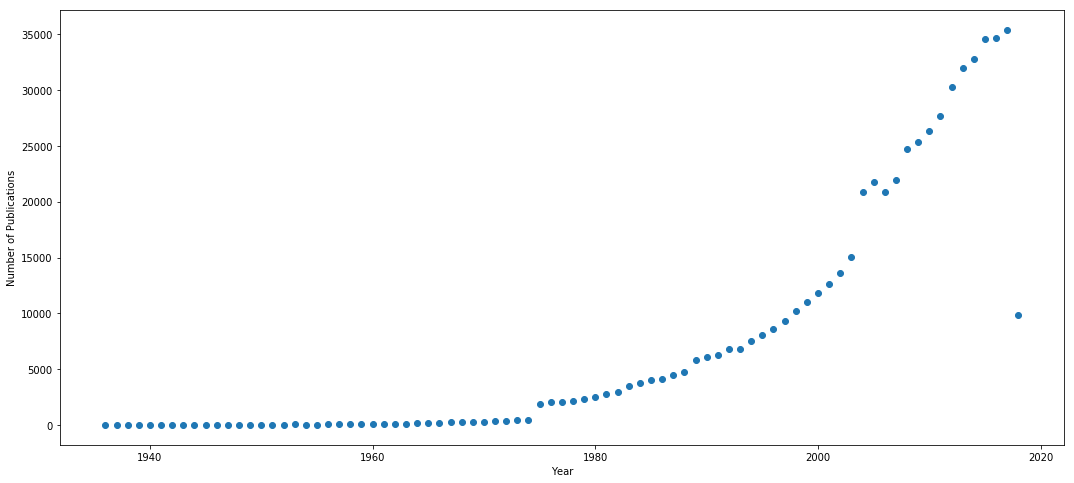

In [14]:
f, ax = plt.subplots(figsize=(18, 8))

_=plt.scatter(x=year_count.index.values, y=year_count)
plt.xlabel('Year')
plt.ylabel('Number of Publications')

Seems like there is a huge jump in the late 70's when personal computers entered the market. Another jump when the internet became popular, and it seems to be growing  exponentially. I'm leaving academia on time :)

# To be continued.....